In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Learning Pytorch!

In [3]:
# Creating a tensor from data
x_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Creating a tensor from numpy array
np_array = np.array([[5.0, 6.0], [7.0, 8.0]])
x_np = torch.from_numpy(np_array)

# Creating tensors with specific dimensions
x_zeros = torch.zeros(2, 3)
x_ones = torch.ones(2, 3)
x_random = torch.rand(2, 3)

#### Practice maniupations with PyTorch
Using the following matrix, add 2, multiply by 2, and then multiply y against itself. This should feel like Numpy.

In [4]:
# Basic operations
y = torch.tensor([[9.0, 10.0], 
                  [11.0, 12.0]])


## A one layer perceptron

As shown in class, the one-layer perceptron can actually be thought of as linear regression or logistic regression. Use the same intuition from your HW sets to train your perceptrons.

Text(0, 0.5, 'y')

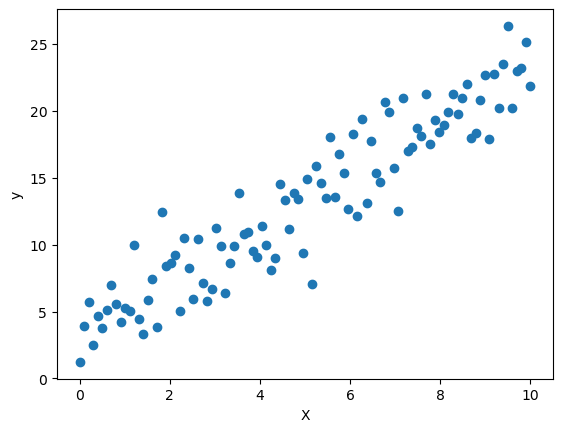

In [5]:
# Generate synthetic data for linear regression
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(100, 1) * 2  # Linear relation with some noise

# Visualize the data
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

Defining these classes, and the structure inside the class, is what is commonly known as the "architecture" of your model.

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

In [7]:
# Instantiate the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 6.0590
Epoch [20/100], Loss: 5.9406
Epoch [30/100], Loss: 5.8333
Epoch [40/100], Loss: 5.7362
Epoch [50/100], Loss: 5.6484
Epoch [60/100], Loss: 5.5688
Epoch [70/100], Loss: 5.4968
Epoch [80/100], Loss: 5.4316
Epoch [90/100], Loss: 5.3726
Epoch [100/100], Loss: 5.3191


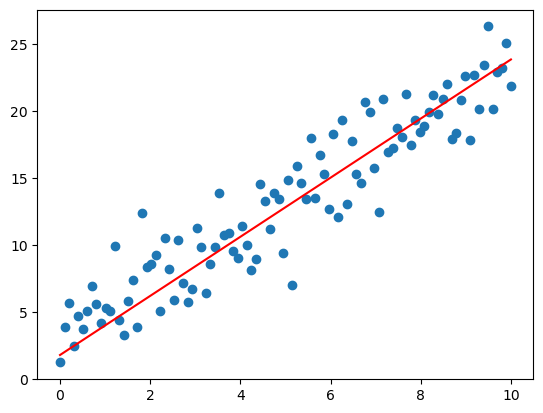

In [10]:
# Plot the model's predictions
predicted = model(X).detach().numpy()  # Detach to convert to numpy
plt.plot(X.numpy(), predicted, color="red", label="Fitted Line")
plt.scatter(X.numpy(), y.numpy())

In [11]:
model.linear.weight.data, model.linear.bias.data

(tensor([[2.2086]]), tensor([1.7938]))

### Using the template code above, generate 3-dimensional synthetic linear regression data
You are encouraged to translate your homework solution from numpy into torch.

In [18]:
X1 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X2 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X3 = torch.linspace(0, 10, 100).reshape(-1, 1) + torch.randn(100, 1)
X = torch.hstack((X1,X2,X3))
B  = torch.tensor([1,2,3,4])
y = B[0] + (X * B[1:]).sum(axis=1).unsqueeze(1) + torch.randn(100, 1)

Build your own neural net!

In [22]:
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [64]:
model = MultiLinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [38]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/1000], Loss: 1.1229
Epoch [20/1000], Loss: 1.1229
Epoch [30/1000], Loss: 1.1229
Epoch [40/1000], Loss: 1.1229
Epoch [50/1000], Loss: 1.1229
Epoch [60/1000], Loss: 1.1229
Epoch [70/1000], Loss: 1.1229
Epoch [80/1000], Loss: 1.1229
Epoch [90/1000], Loss: 1.1229
Epoch [100/1000], Loss: 1.1229
Epoch [110/1000], Loss: 1.1229
Epoch [120/1000], Loss: 1.1229
Epoch [130/1000], Loss: 1.1229
Epoch [140/1000], Loss: 1.1229
Epoch [150/1000], Loss: 1.1229
Epoch [160/1000], Loss: 1.1229
Epoch [170/1000], Loss: 1.1229
Epoch [180/1000], Loss: 1.1229
Epoch [190/1000], Loss: 1.1229
Epoch [200/1000], Loss: 1.1229
Epoch [210/1000], Loss: 1.1229
Epoch [220/1000], Loss: 1.1229
Epoch [230/1000], Loss: 1.1229
Epoch [240/1000], Loss: 1.1229
Epoch [250/1000], Loss: 1.1229
Epoch [260/1000], Loss: 1.1229
Epoch [270/1000], Loss: 1.1229
Epoch [280/1000], Loss: 1.1229
Epoch [290/1000], Loss: 1.1229
Epoch [300/1000], Loss: 1.1229
Epoch [310/1000], Loss: 1.1229
Epoch [320/1000], Loss: 1.1229
Epoch [330/1000],

In [42]:
print("\nTrue Beta values:")
print("Bias:", B[0].item())
print("Weights:", B[1:].tolist())

print("\nLearned Beta values:")
print("Bias:", model.linear.bias.item())
print("Weights:", model.linear.weight.data.view(-1).tolist())


True Beta values:
Bias: 1
Weights: [2, 3, 4]

Learned Beta values:
Bias: 1.0713223218917847
Weights: [2.0130558013916016, 2.8362174034118652, 4.135401248931885]


## Building a neural net for XOR

Build a neural net for solving the XOR problem. The first line layer is written for you.
Use the training code from above to make one run, and assess whether your output is good or not.
Once you get it to run, try varying the number of layers and the number of hidden dimensions. What do you observe?

In [65]:
# XOR inputs and labels
X = torch.tensor([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], 
                  [1], 
                  [1], 
                  [0]], dtype=torch.float32)

In [94]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)   # Input layer to hidden layer
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation for hidden layer
        x = torch.sigmoid(self.fc2(x))
        
        return x

# Instantiate the model
model = XORNet()

In [93]:
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [95]:
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/5000], Loss: {loss.item():.4f}")

Epoch [500/5000], Loss: 0.2454
Epoch [1000/5000], Loss: 0.2454


## After training, try to see if your predictions are good.

In [92]:
# Here, testing for the combination [1, 0]
test_input = torch.tensor([[1, 0]], dtype=torch.float32)

# Make the prediction
with torch.no_grad():  # No need for gradients during inference
    prediction = model(test_input)
    # Apply threshold to get binary prediction
    predicted_class = (prediction > 0.5).float()
    
predicted_class

tensor([[1.]])